Importing necessary libraries


In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score


Loading dataset


In [237]:
df=pd.read_csv("Mall_Customers.csv")

In [238]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [239]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [240]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Renaming column **Genre** to **Gender**

In [241]:
df=df.rename(columns={"Genre": "Gender"})
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [242]:
df.shape

(200, 5)

In [243]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

**Data Cleaning**

In [244]:
#Checking null values
df.isna().any()


CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

From above it can be seen that there are no null values in any of the column in the dataframe


In [245]:
#Count of null values in each column of the dataframe
null_values=df.isna().sum()
null_values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [246]:
#Checking if there are duplicate records
def check_duplicates(df):
  boolean=df.duplicated(subset = 'CustomerID').any()
  return boolean
if(check_duplicates(df)):
  print("There are duplicate records")
else:
  print("There are no duplicate records")


There are no duplicate records


**Exploratory Data Analysis**(**EDA**)

In [247]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Describe is used to show the statistical summary of the data for the numerical columns,therefore gender is excluded as it is categorical column

In [248]:
categorical_col=df.select_dtypes(include=['object']).columns
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(categorical_col)
print("Numerical Variables:")
print(numerical_col)

Categorical Variables:
Index(['Gender'], dtype='object')
Numerical Variables:
['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [249]:
#Converting object columns into categorical columns
df["Gender"] = df["Gender"].astype("category")
df.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

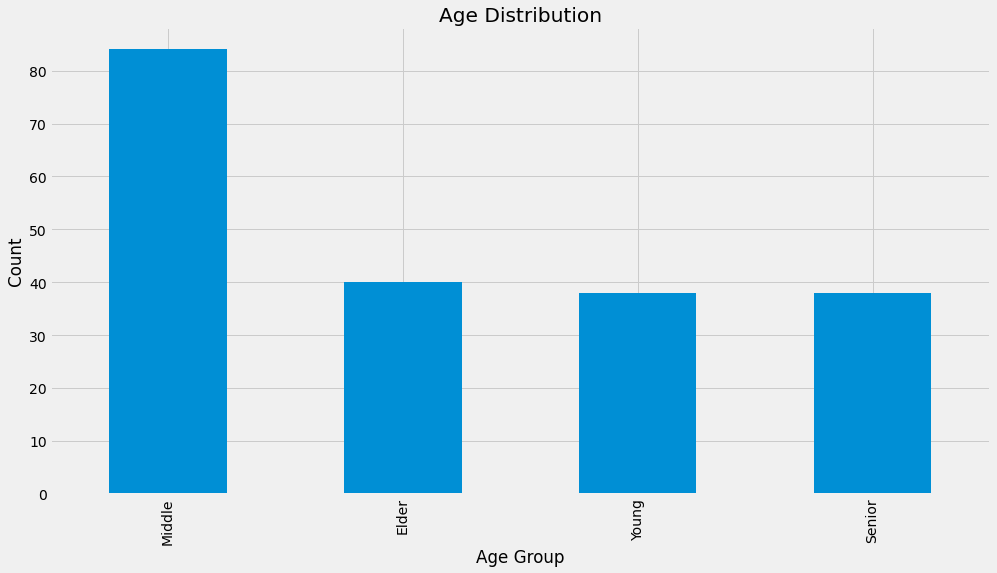

In [250]:
#UNIVARIATE ANALYSIS
#Analysis of Age
ages=df['Age']
age_groups = pd.cut(ages, bins=[0, 25, 40, 50, 100],labels=['Young', 'Middle', 'Senior', 'Elder'])

# Count the number of occurrences of each age group
age_counts = age_groups.value_counts()

# Plot a bar chart
age_counts.plot(kind='bar')

# Set the axis labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution')

# Show the plot
plt.show()











From the above bar plot it can be seen that there are huge number of middle aged customers.
There are customers of wide variety of ages

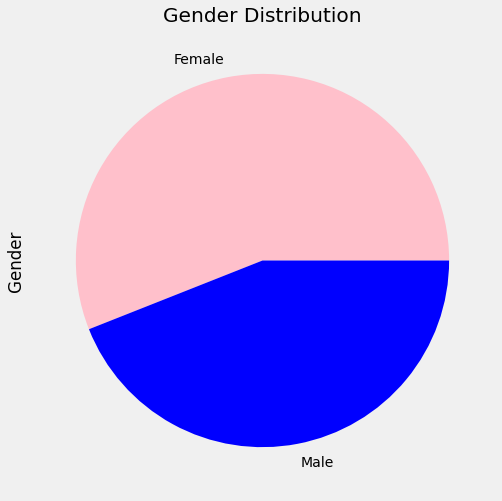

In [251]:
#Analysis for gender
#Since gender is categorical the best suitable plot is pie chart
# Count the number of occurrences of each gender
gender=df['Gender']
gender_count = gender.value_counts()
colors = ['pink', 'blue']
# Plot a pie chart
gender_count.plot(kind='pie',colors=colors)

# Set the title
plt.title('Gender Distribution')

# Show the plot
plt.show()

From the above pie chart it can be concluded that number of females customers are larger than males.


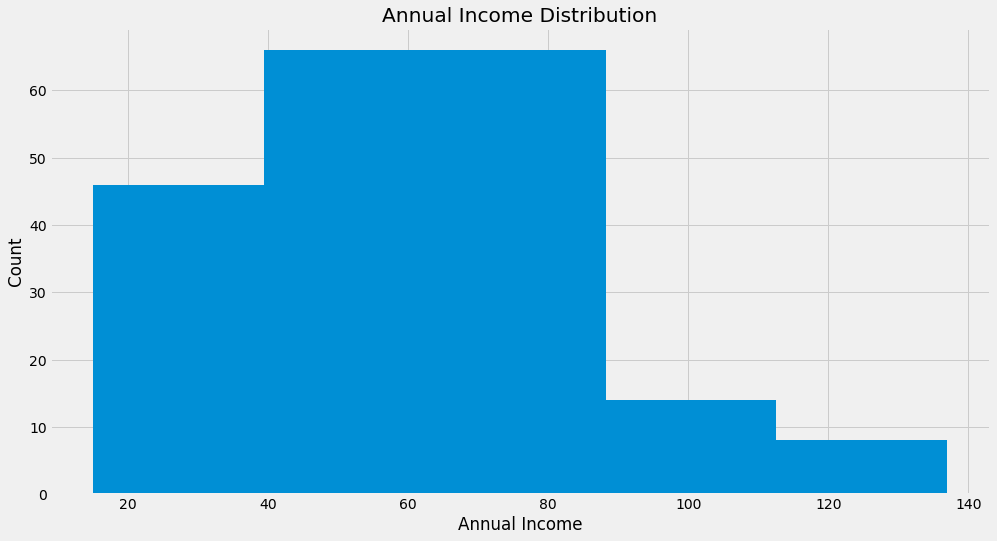

In [252]:
#Analysis of annual income
#analysis of income
# Create a Pandas DataFrame

# Plot a histogram
df.hist(column='Annual Income (k$)', bins=5)

# Set the axis labels and title
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Annual Income Distribution')

# Show the plot
plt.show()

Most of the annual income falls between 40K to 85K.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


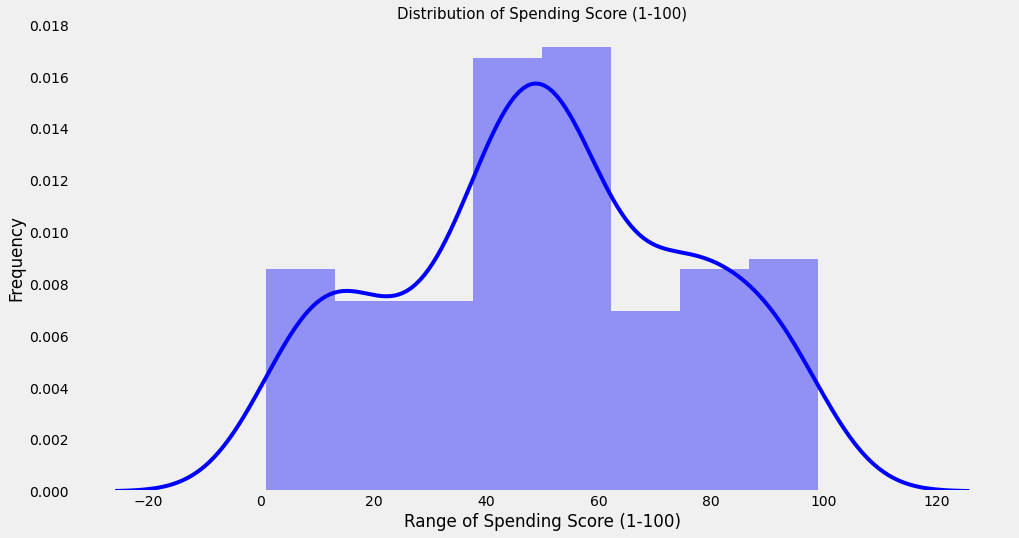

In [253]:
#Analysis of spending score
sns.distplot(df['Spending Score (1-100)'], color = 'blue')
plt.title('Distribution of Spending Score (1-100)', fontsize = 15)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

Most of the customers got the score ranging between 40 to 60

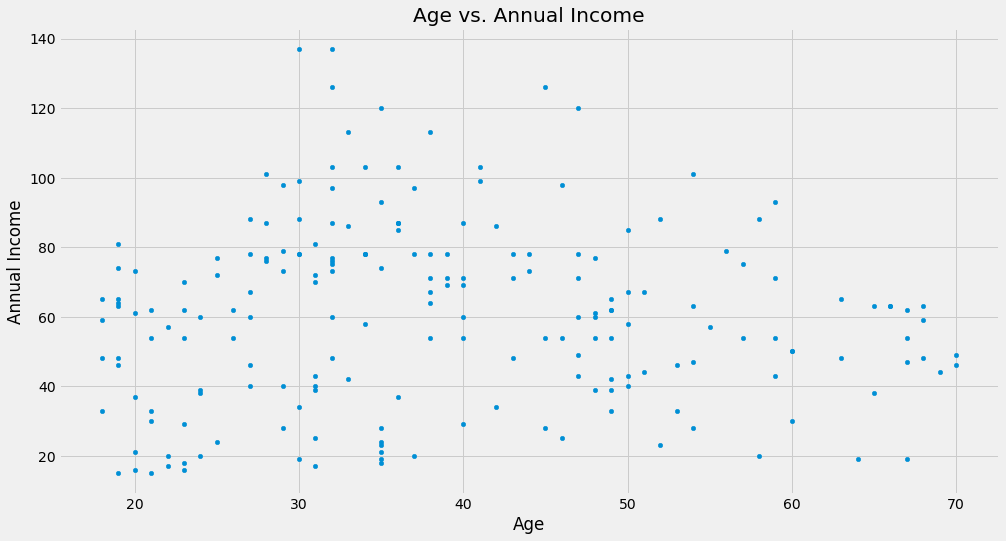

In [254]:
#Bivariate Analysis
#Analysis between age and annual income
df.plot(kind='scatter', x='Age', y='Annual Income (k$)')

# Set the axis labels and title
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Age vs. Annual Income')

# Show the plot
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


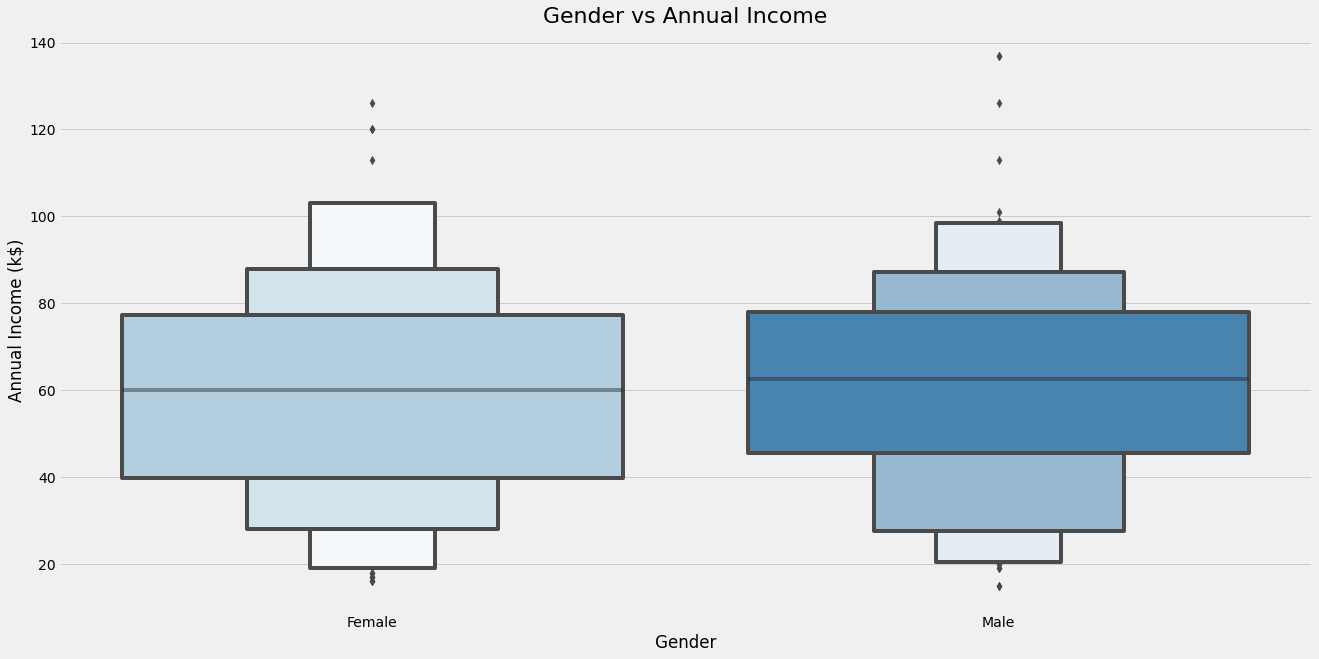

In [255]:
#Analysis between gender and annual income
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (20, 10))

sns.boxenplot(df['Gender'], df['Annual Income (k$)'], palette = 'Blues')
plt.title('Gender vs Annual Income', fontsize = 22)
plt.show()

Text(0, 0.5, 'count')

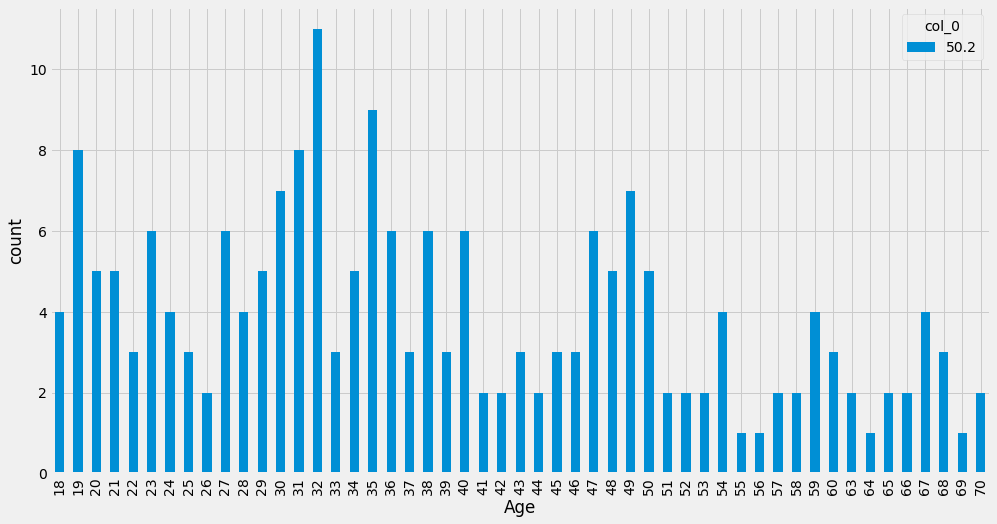

In [256]:
#Analysis between age and spending score
age=df['Age']
average=df["Spending Score (1-100)"].mean()
avg_spending=average
pd.crosstab(age,avg_spending).plot(kind='bar')

plt.xlabel("Age")
plt.ylabel("count")

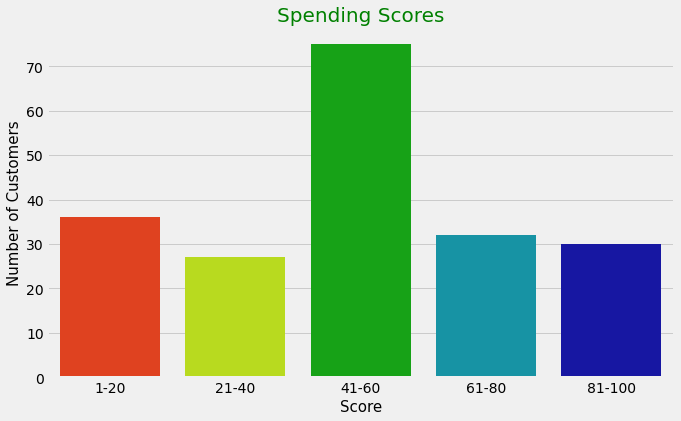

In [257]:
# Spending Score - 

ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

score_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
score_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=score_x, y=score_y,palette="nipy_spectral_r")
plt.title("Spending Scores", fontsize=20,color="green")
plt.xlabel("Score", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)
plt.show()

<Figure size 1440x720 with 0 Axes>

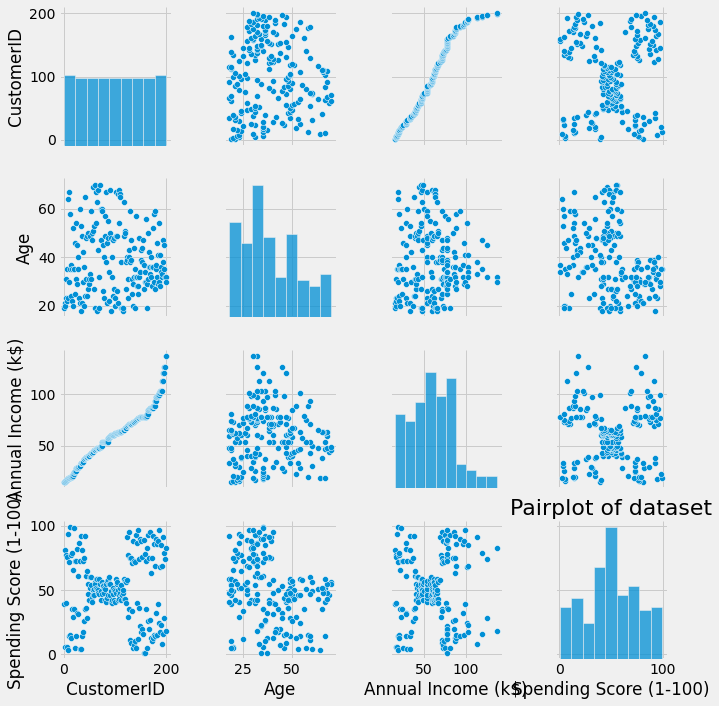

In [258]:
#Multivariate analysis
fig = plt.figure(figsize = (20, 10))

sns.pairplot(df)
plt.title('Pairplot of dataset', fontsize = 22)
plt.show()

In [259]:

corr_matrix=df.corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


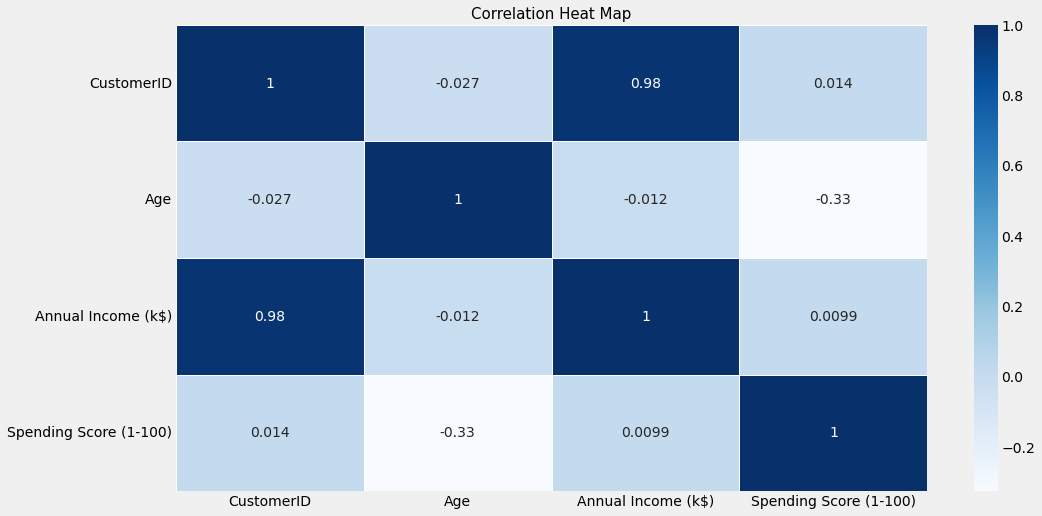

In [260]:
#Heat map to check correlation between variables
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(corr_matrix, annot = True, linewidth = 0.5, cmap="Blues")
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

In [261]:
#Considering only those features which are important
columns=df[["Age","Annual Income (k$)","Spending Score (1-100)"]]

**STANDARDISATION OF DATA**

In [262]:
#Rescaling
#Here we are standardizing the data set using standardization method
sc = StandardScaler()
X_df = sc.fit_transform(columns) 
col_names = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
scaled_columns = pd.DataFrame(X_df, columns =col_names )
scaled_columns.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [263]:
#converts categorical data into dummy variable(numerical)

# create dummy variables for Gender
gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender')

# concatenate the dummy variables with the original dataframe
new_df = pd.concat([scaled_columns, gender_dummies], axis=1)
new_df = new_df.drop(['Gender_Male'],axis=1)

print(new_df)

     Annual Income (k$)       Age  Spending Score (1-100)  Gender_Female
0             -1.424569 -1.738999               -0.434801              0
1             -1.281035 -1.738999                1.195704              0
2             -1.352802 -1.700830               -1.715913              1
3             -1.137502 -1.700830                1.040418              1
4             -0.563369 -1.662660               -0.395980              1
..                  ...       ...                     ...            ...
195           -0.276302  2.268791                1.118061              1
196            0.441365  2.497807               -0.861839              1
197           -0.491602  2.497807                0.923953              0
198           -0.491602  2.917671               -1.250054              0
199           -0.635135  2.917671                1.273347              0

[200 rows x 4 columns]


In [264]:
#PCA
#reduce the dimensions (or features) of our dataset to any number less than current number of features because of which data is compressed
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(new_df)
PCA_components = pd.DataFrame(principalComponents)
PCA_components

,0,1
0,-0.600438,-1.737179
1,-1.649886,-1.789124
2,0.315381,-1.692772
3,-1.477989,-1.781317
4,-0.060545,-1.678691
...,...,...
195,-1.101819,2.201867
196,0.792047,2.517450
197,-1.089706,2.470818
198,0.425949,2.964343


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

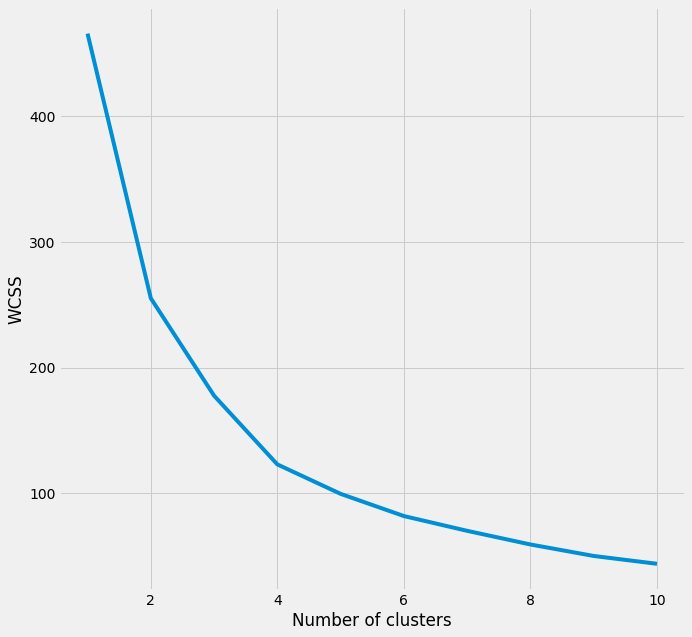

In [265]:
#Elbow method is used to find the optimal number of clusters required
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(PCA_components.iloc[:,:2])
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

It can be seen that 4 is the optimal number of clusters

In [266]:
#building a model with 4 clusters
km= KMeans( n_clusters = 4, init='k-means++')
km.fit(PCA_components.iloc[:,:2])

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [267]:
#Evaluating the accuracy using silhouette score with pca 
score = silhouette_score(PCA_components, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.423


In [268]:
#Evaluating the accuracy using silhouette score without pca 
score = silhouette_score(new_df, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.313


Therefore accuracy with pca is better than without pca

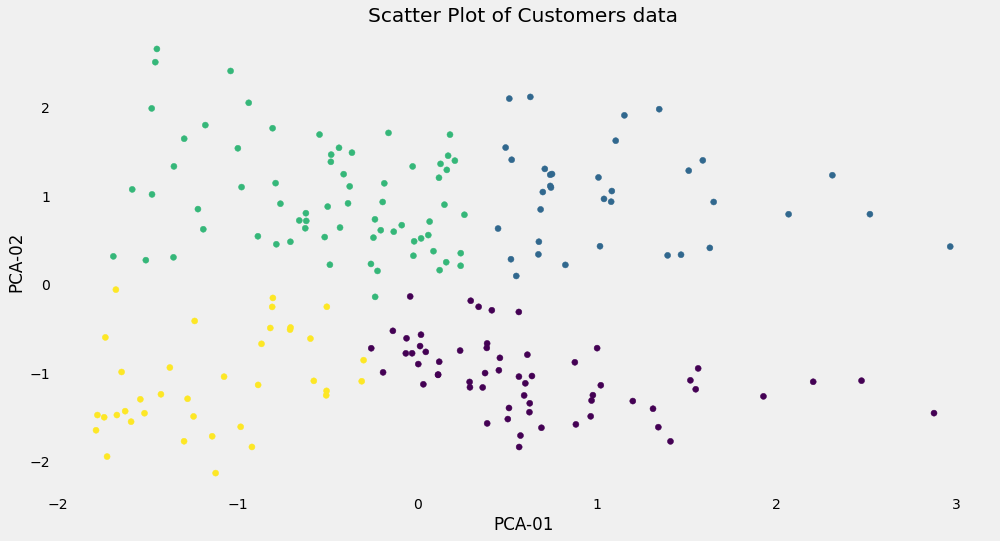

In [269]:
# Scatter plot visuals with labels

xs = PCA_components.iloc[:,0]
ys = PCA_components.iloc[:,1]
plt.scatter(ys, xs,c=km.labels_)

plt.grid(False)
plt.title('Scatter Plot of Customers data')
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')

plt.show()

In [270]:
#Assigning cluster number to each customer
df = pd.read_csv('Mall_Customers.csv')
pred = km.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3


In [271]:
#Grouping all the customers by cluster number
new_df1 = pd.DataFrame(df.groupby(['cluster','Age','Annual Income (k$)','Spending Score (1-100)'])['cluster'].count())
new_df1

cluster
cluster Age Annual Income (k$) Spending Score (1-100)         
0       18  59                 41                            1
            65                 48                            1
        19  63                 54                            1
            64                 46                            1
            65                 50                            1
...                                                        ...
3       32  48                 47                            1
        33  42                 60                            1
        35  19                 99                            1
            23                 98                            1
            28                 61                            1

[200 rows x 1 columns]

<AxesSubplot:xlabel='cluster', ylabel='Age'>

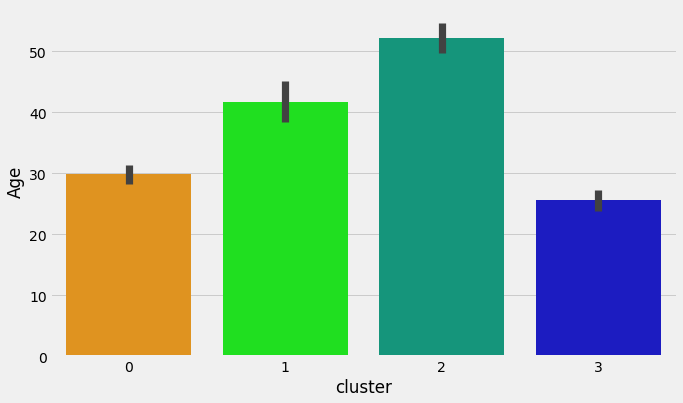

In [272]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['cluster'], y=df['Age'],palette="nipy_spectral_r")


<AxesSubplot:xlabel='cluster', ylabel='Annual Income (k$)'>

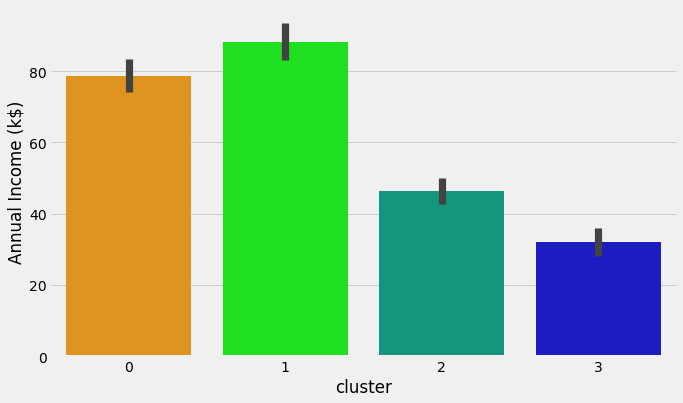

In [274]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['cluster'], y=df['Annual Income (k$)'],palette="nipy_spectral_r")

<AxesSubplot:xlabel='cluster', ylabel='Spending Score (1-100)'>

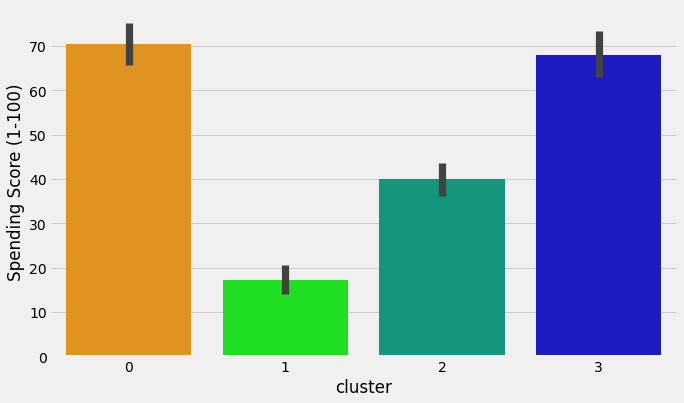

In [276]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['cluster'], y=df['Spending Score (1-100)'],palette="nipy_spectral_r")